<a href="https://colab.research.google.com/github/gustavo-plc/PyStatistics/blob/main/AEDI_PROVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTEBOOK DESTINADO A REGISTRAR AS TAREFAS DA DISCIPLINA DE AEDI - 1º/2025
### PROFESSOR: JOÃO GABRIEL DE MORAES SOUZA
### ALUNO: GUSTAVO PARREIRA LIMA CUNHA

# **PROVA**

## QUESTÃO 1

### 1. Análise Descritiva dos Dados (20%)

In [33]:
import pandas as pd

# Especificação do caminho do arquivo csv

path = '/content/drive/MyDrive/AEDI/kc_house_data.csv'

dados = pd.read_csv(path)

# teste de exibição do df

print(dados)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

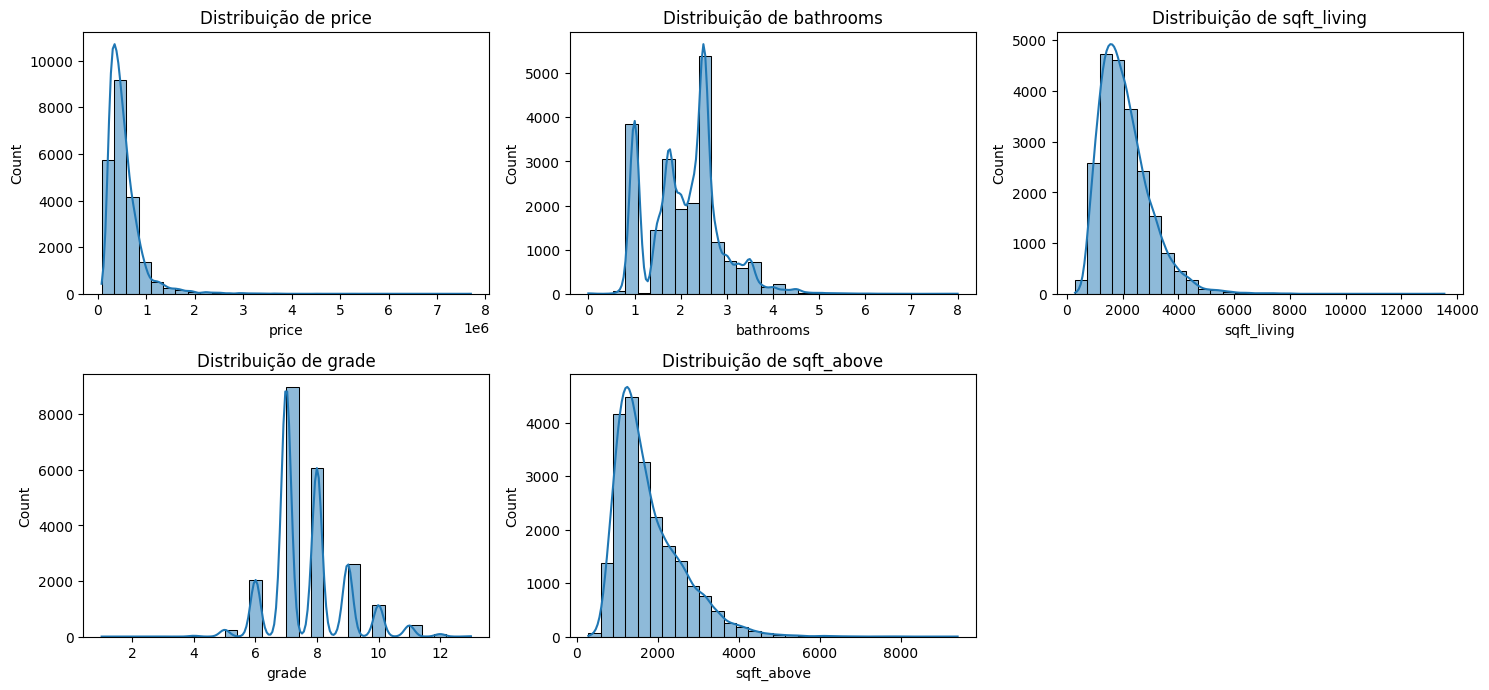


Correlação entre variáveis numéricas:


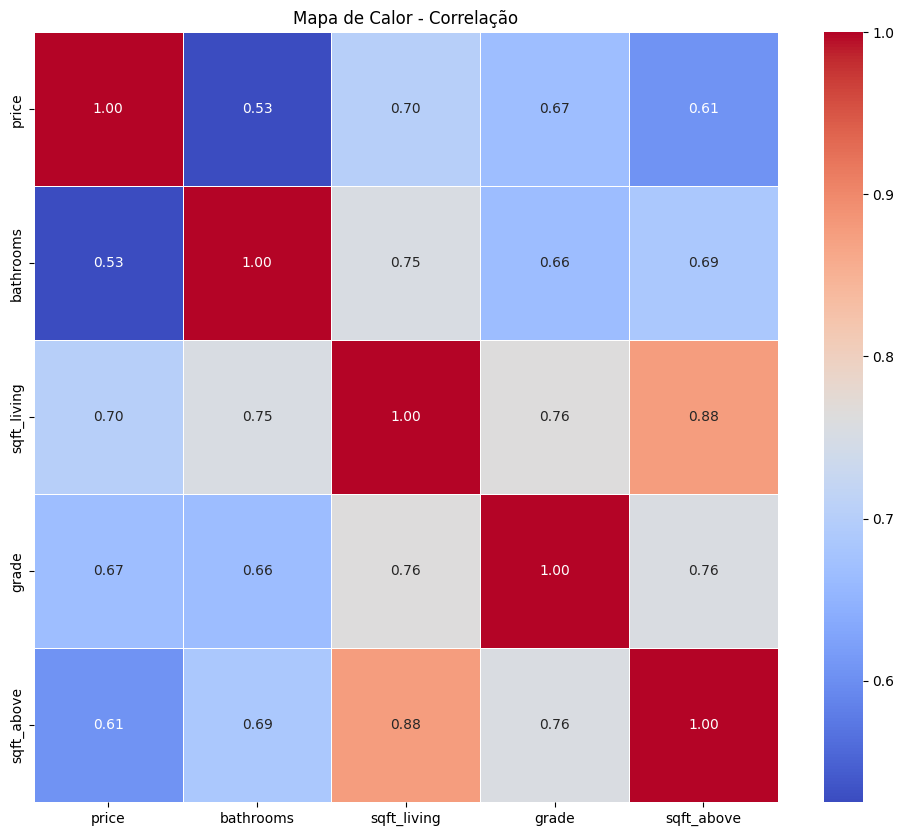


Dispersão entre todas as variáveis numéricas e price:


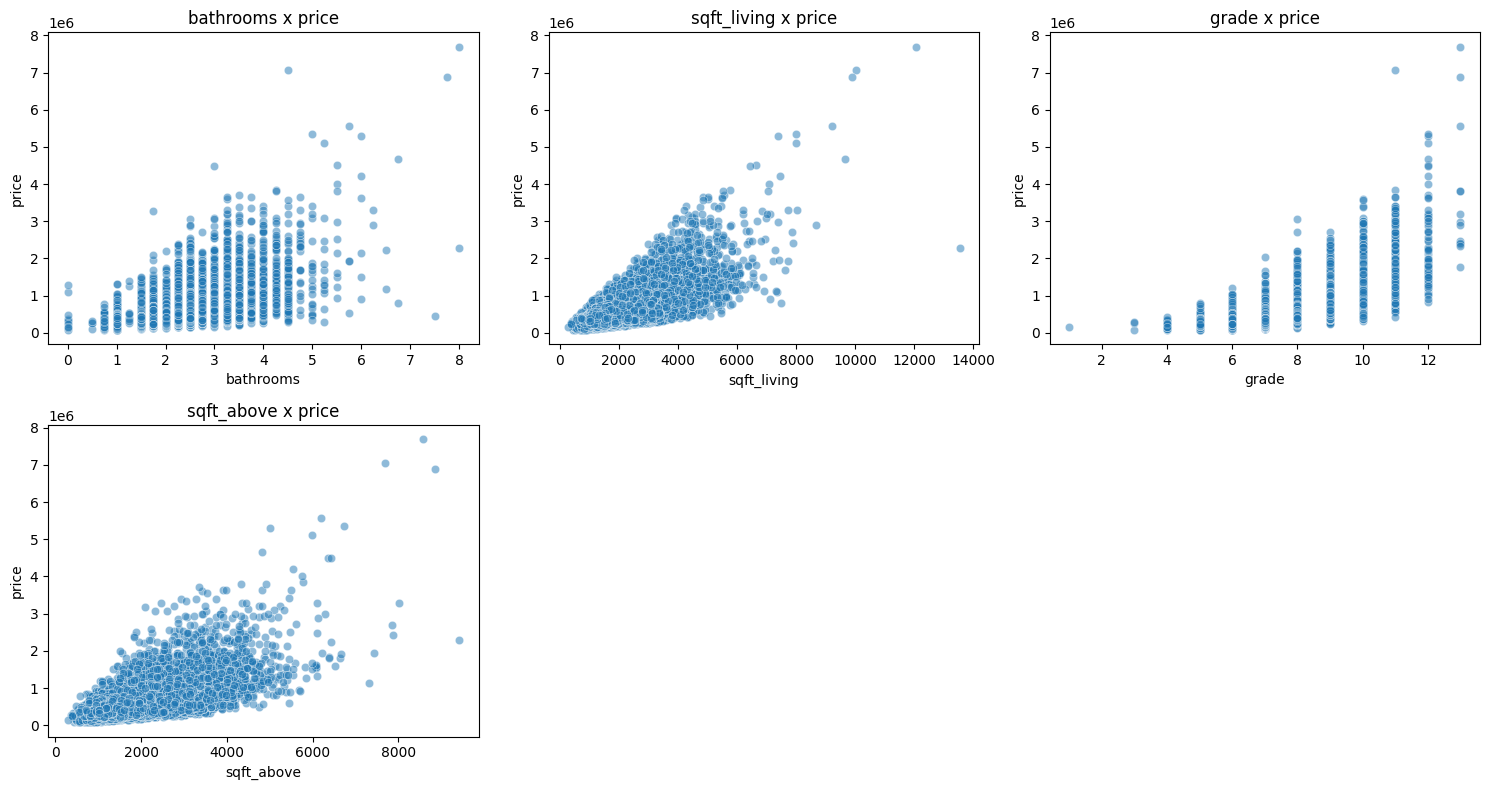

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Informações básicas do DataFrame
print(dados.info())

# Verificar valores ausentes
print("\nValores nulos por coluna:")
print(dados.isnull().sum())

# DATAFRAME SEM REGISTROS AUSENTES!

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(dados.describe().T)

# Mediana
print("\nMedianas:")
print(dados.median(numeric_only=True))

# seleção das variáveis numéricas e relevantes

numeric_cols = [col for col in dados.select_dtypes(include='number').columns
                if col not in ['id', 'zipcode', 'sqft_lot', 'lat', 'waterfront', 'long', 'view', 'sqft_lot', 'sqft_lot15', 'date', 'bedrooms', 'floors', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15']]


print(numeric_cols)

print("\nDistribuição das variáveis numéricas")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols[:9]):
    plt.subplot(3, 3, i+1)
    sns.histplot(dados[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

# Matriz de correlação
print("\nCorrelação entre variáveis numéricas:")
corr = dados[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor - Correlação')
plt.show()

# gráficos de dispersão para todas as variáveis em numeric_cols
target = 'price'

print(f"\nDispersão entre todas as variáveis numéricas e {target}:")

num_plots = len(numeric_cols)
num_cols_per_row = 3
num_rows = (num_plots + num_cols_per_row - 1) // num_cols_per_row

plt.figure(figsize=(num_cols_per_row * 5, num_rows * 4))

features_for_scatter = [col for col in numeric_cols if col != target]

for i, feature in enumerate(features_for_scatter):
    plt.subplot(num_rows, num_cols_per_row, i + 1)
    sns.scatterplot(data=dados, x=feature, y=target, alpha=0.5)
    plt.title(f'{feature} x {target}')
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

Após análise da distribuição das variáveis VS o preço das residências foi possível extrair algumas variáveis e trabalhar somente com as supostamente relevantes no array numeric_cals. Em seguida, o mapa de calor da matriz de correlação mostrou que de fato as variáves escolhidas são relevantes para a definição do preço de venda, pois possuem alto valor de correlação (>0.5). Portanto, o modelo só levará em conta as variáveis estatisticamente relevantes.

### 2. Construção do Modelo de Regressão Linear (30%)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Seleção de variáveis com boa correlação
X = dados[['bathrooms', 'sqft_living', 'grade', 'sqft_above']]
y = dados['price']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação e treino do modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd


# Fazer previsões com o conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliação do modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Extrair os coeficientes e o intercepto do modelo
intercepto = modelo.intercept_
coeficientes = modelo.coef_

# Imprimir o intercepto
print("\n--- Coeficientes da Regressão Linear ---")
print(f"Intercepto (b0): {intercepto:,.2f}")
print("O intercepto é o valor esperado de 'price' quando todas as outras variáveis são zero.")

# Imprimir os coeficientes (b1, b2, etc.) com seus respectivos nomes
print("\nCoeficientes (b1, b2, ...):")
for i, col in enumerate(X.columns):

    print(f"  - {col} (b{i+1}): {coeficientes[i]:,.2f}")


# Imprimir as métricas de avaliação do modelo
print("\nMétricas de Avaliação do Modelo ---")
print(f"R² (Coeficiente de Determinação): {r2:.4f}")
print(f"MAE (Erro Médio Absoluto): {mae:,.2f}")
print(f"MSE (Erro Quadrático Médio): {mse:,.2f}")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:,.2f}")


--- Coeficientes da Regressão Linear ---
Intercepto (b0): -635,331.21
O intercepto é o valor esperado de 'price' quando todas as outras variáveis são zero.

Coeficientes (b1, b2, ...):
  - bathrooms (b1): -33,413.97
  - sqft_living (b2): 252.30
  - grade (b3): 112,270.99
  - sqft_above (b4): -77.73

Estes coeficientes representam a mudança média em 'price' para um aumento de uma unidade na variável correspondente, mantendo as outras constantes.

Métricas de Avaliação do Modelo ---
R² (Coeficiente de Determinação): 0.5474
MAE (Erro Médio Absoluto): 164,587.59
MSE (Erro Quadrático Médio): 68,416,741,563.20
RMSE (Raiz do Erro Quadrático Médio): 261,565.94


O coeficiente negativo de bathrooms e de sqft_above é um indício de multicolinearidade entre as variáveis. Para isso será avaliada a multicolinearidade entre as variáveis, para retirar as variáveis redundantes. Para isso, será calculado o VIF.

In [39]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Define as variáveis explicativas
X = dados[['bathrooms', 'sqft_living', 'grade', 'sqft_above']]

# Adiciona constante (necessário para o VIF)
X_const = add_constant(X)

# Calcula o VIF para cada variável
vif = pd.DataFrame()
vif["Variável"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostra o resultado
print(vif)


      Variável        VIF
0        const  64.102382
1    bathrooms   2.431607
2  sqft_living   5.604936
3        grade   2.700996
4   sqft_above   4.688726


Será portanto retirada a coluna sqft_above, que apesar de não possuir alto valor de VIF, é uma variável derivada, pois sqft_living = sqft_above + sqft_basement. Será ainda adicionada a variável "condition" para melhor treinamento do modelo e retirada a variável bathroom, pois apresentou coeficiente negativo e sua influência no preço já é apresentada pela variável sqft_living.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Seleção de variáveis com boa correlação
X = dados[['sqft_living', 'grade', 'condition']]
y = dados['price']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação e treino do modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd


# Fazer previsões com o conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliação do modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Extrair os coeficientes e o intercepto do modelo
intercepto = modelo.intercept_
coeficientes = modelo.coef_

# Imprimir o intercepto
print("\n--- Coeficientes da Regressão Linear ---")
print(f"Intercepto (b0): {intercepto:,.2f}")
print("O intercepto é o valor esperado de 'price' quando todas as outras variáveis são zero.")

# Imprimir os coeficientes (b1, b2, etc.) com seus respectivos nomes
print("\nCoeficientes (b1, b2, ...):")
for i, col in enumerate(X.columns):

    print(f"  - {col} (b{i+1}): {coeficientes[i]:,.2f}")


# Imprimir as métricas de avaliação do modelo
print("\nMétricas de Avaliação do Modelo ")
print(f"R² (Coeficiente de Determinação): {r2:.4f}")
print(f"MAE (Erro Médio Absoluto): {mae:,.2f}")
print(f"MSE (Erro Quadrático Médio): {mse:,.2f}")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:,.2f}")


--- Coeficientes da Regressão Linear ---
Intercepto (b0): -842,178.04
O intercepto é o valor esperado de 'price' quando todas as outras variáveis são zero.

Coeficientes (b1, b2, ...):
  - sqft_living (b1): 179.57
  - grade (b2): 104,417.93
  - condition (b3): 61,141.29

Métricas de Avaliação do Modelo 
R² (Coeficiente de Determinação): 0.5517
MAE (Erro Médio Absoluto): 163,906.92
MSE (Erro Quadrático Médio): 67,771,360,708.15
RMSE (Raiz do Erro Quadrático Médio): 260,329.33


Melhorou, mas R² de 55,17 ainda representa um modelo que explica pouco. Tentarei representar a localidade da casa usando a variável zip code. Também incluirei 'sqft_living15', para medir o impacto da vizinhança no preço de venda.

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Seleção de variáveis com boa correlação
X = dados[['sqft_living', 'grade', 'condition', 'sqft_living15', 'zipcode']]
y = dados['price']


implementando hot_encoding em zipcode


# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação e treino do modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

### 3. Interpretação dos Resultados (10%)

### 4. Ajustes no Modelo (30%)

### 5. Tomada de Decisão (10%)